<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 36s 18ms/step - loss: 0.6356 - accuracy: 0.5965 - val_loss: 0.4134 - val_accuracy: 0.8204
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2844 - accuracy: 0.8840 - val_loss: 0.3106 - val_accuracy: 0.8736
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1514 - accuracy: 0.9486 - val_loss: 0.3379 - val_accuracy: 0.8664
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0787 - accuracy: 0.9763 - val_loss: 0.3949 - val_accuracy: 0.8664
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0305 - accuracy: 0.9926 - val_loss: 0.4792 - val_accuracy: 0.8700
Epoch 6/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0136 - accuracy: 0.9967 - val_loss: 0.5796 - val_accuracy: 0.8636
Epoch 7/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0127 - accuracy: 0.9966 - val_loss: 0.62

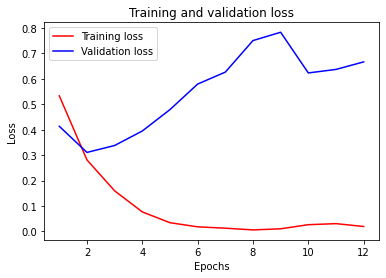

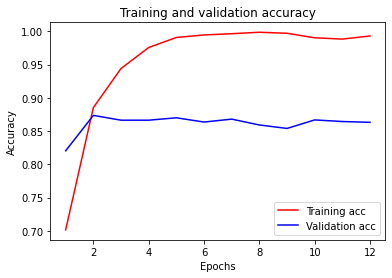

              precision    recall  f1-score   support

           0      0.864     0.882     0.873     12500
           1      0.879     0.861     0.870     12500

    accuracy                          0.871     25000
   macro avg      0.872     0.871     0.871     25000
weighted avg      0.872     0.871     0.871     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6640 - accuracy: 0.5518 - val_loss: 0.3886 - val_accuracy: 0.8184
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.3148 - accuracy: 0.8672 - val_loss: 0.3082 - val_accuracy: 0.8644
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1519 - accuracy: 0.9490 - val_loss: 0.3193 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0649 - accuracy: 0.9812 - val_loss: 0.4015 - val_accuracy: 0.8760
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

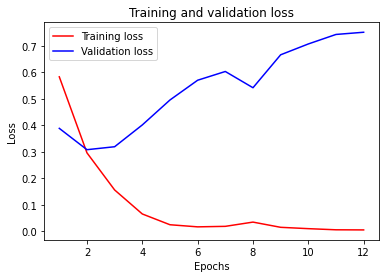

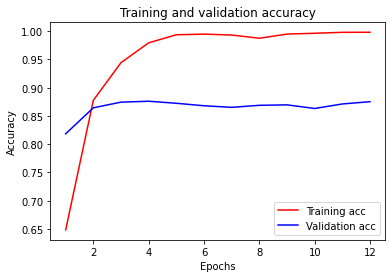

              precision    recall  f1-score   support

           0      0.880     0.872     0.876     12500
           1      0.873     0.881     0.877     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6504 - accuracy: 0.5661 - val_loss: 0.3460 - val_accuracy: 0.8464
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2820 - accuracy: 0.8886 - val_loss: 0.2909 - val_accuracy: 0.8832
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1355 - accuracy: 0.9558 - val_loss: 0.3359 - val_accuracy: 0.8712
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0548 - accuracy: 0.9855 - val_loss: 0.3832 - val_accuracy: 0.8764
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

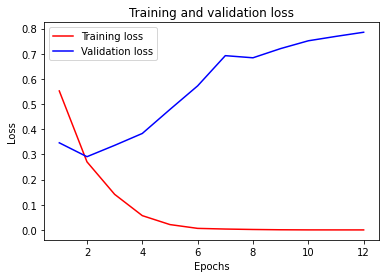

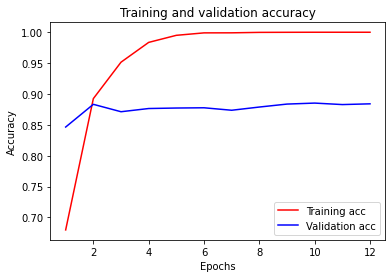

              precision    recall  f1-score   support

           0      0.883     0.871     0.877     12500
           1      0.873     0.884     0.879     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6511 - accuracy: 0.5729 - val_loss: 0.3593 - val_accuracy: 0.8452
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2941 - accuracy: 0.8756 - val_loss: 0.3095 - val_accuracy: 0.8700
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1509 - accuracy: 0.9468 - val_loss: 0.3389 - val_accuracy: 0.8676
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.4309 - val_accuracy: 0.8620
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

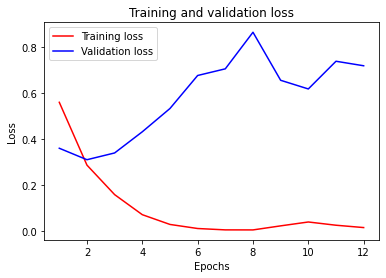

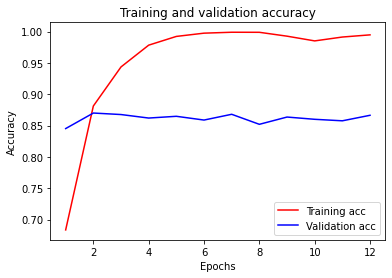

              precision    recall  f1-score   support

           0      0.886     0.856     0.871     12500
           1      0.861     0.890     0.875     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.6398 - accuracy: 0.5853 - val_loss: 0.3747 - val_accuracy: 0.8376
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2702 - accuracy: 0.8887 - val_loss: 0.2821 - val_accuracy: 0.8820
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1200 - accuracy: 0.9597 - val_loss: 0.3142 - val_accuracy: 0.8832
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0541 - accuracy: 0.9854 - val_loss: 0.3533 - val_accuracy: 0.8852
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

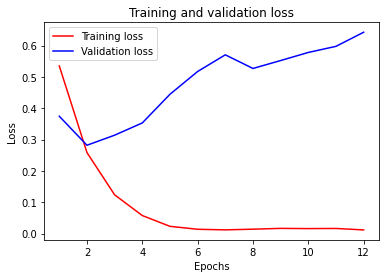

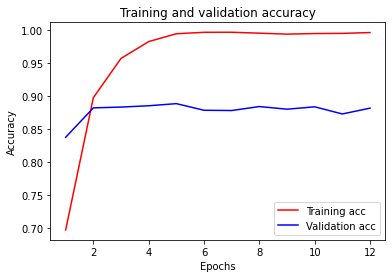

              precision    recall  f1-score   support

           0      0.898     0.853     0.875     12500
           1      0.860     0.903     0.881     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6454 - accuracy: 0.5804 - val_loss: 0.3757 - val_accuracy: 0.8344
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2821 - accuracy: 0.8859 - val_loss: 0.2968 - val_accuracy: 0.8744
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1347 - accuracy: 0.9559 - val_loss: 0.3127 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0594 - accuracy: 0.9846 - val_loss: 0.3916 - val_accuracy: 0.8740
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

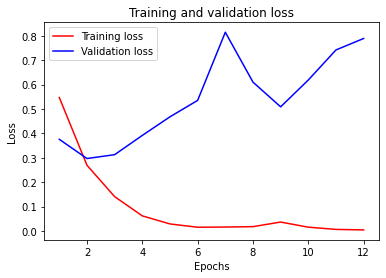

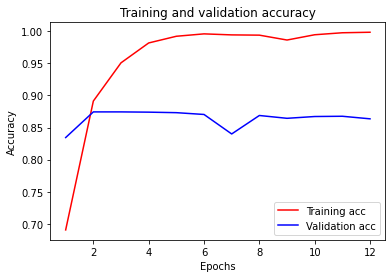

              precision    recall  f1-score   support

           0      0.892     0.856     0.874     12500
           1      0.862     0.896     0.879     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6608 - accuracy: 0.5570 - val_loss: 0.3385 - val_accuracy: 0.8568
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2788 - accuracy: 0.8859 - val_loss: 0.2845 - val_accuracy: 0.8812
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1356 - accuracy: 0.9541 - val_loss: 0.3082 - val_accuracy: 0.8824
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0620 - accuracy: 0.9832 - val_loss: 0.4220 - val_accuracy: 0.8800
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

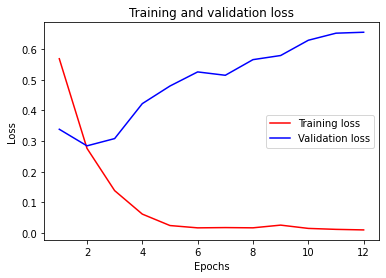

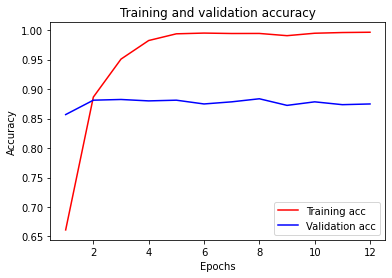

              precision    recall  f1-score   support

           0      0.855     0.907     0.880     12500
           1      0.901     0.846     0.873     12500

    accuracy                          0.876     25000
   macro avg      0.878     0.876     0.876     25000
weighted avg      0.878     0.876     0.876     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6470 - accuracy: 0.5708 - val_loss: 0.3322 - val_accuracy: 0.8612
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2598 - accuracy: 0.8981 - val_loss: 0.2924 - val_accuracy: 0.8724
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1274 - accuracy: 0.9579 - val_loss: 0.3085 - val_accuracy: 0.8856
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0524 - accuracy: 0.9869 - val_loss: 0.3982 - val_accuracy: 0.8776
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

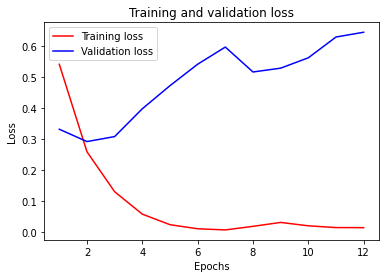

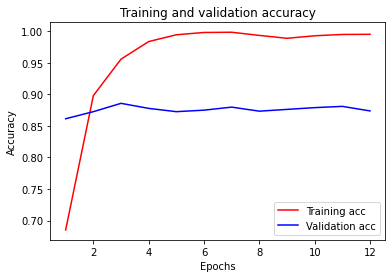

              precision    recall  f1-score   support

           0      0.875     0.885     0.880     12500
           1      0.884     0.873     0.878     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6402 - accuracy: 0.5962 - val_loss: 0.3546 - val_accuracy: 0.8452
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.2901 - accuracy: 0.8799 - val_loss: 0.2875 - val_accuracy: 0.8864
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1353 - accuracy: 0.9543 - val_loss: 0.3082 - val_accuracy: 0.8820
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0643 - accuracy: 0.9813 - val_loss: 0.4726 - val_accuracy: 0.8600
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

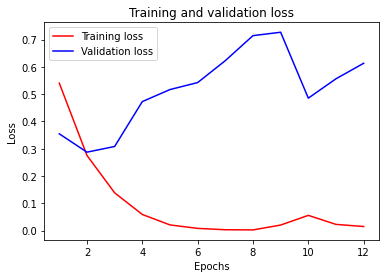

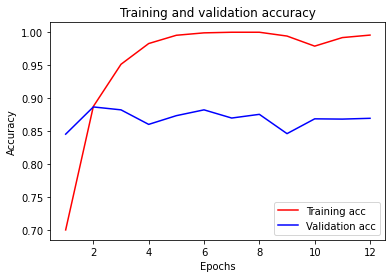

              precision    recall  f1-score   support

           0      0.890     0.859     0.874     12500
           1      0.864     0.893     0.879     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6487 - accuracy: 0.5616 - val_loss: 0.3382 - val_accuracy: 0.8508
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.2617 - accuracy: 0.8942 - val_loss: 0.3017 - val_accuracy: 0.8788
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1231 - accuracy: 0.9586 - val_loss: 0.3591 - val_accuracy: 0.8708
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0555 - accuracy: 0.9854 - val_loss: 0.4118 - val_accuracy: 0.8752
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.

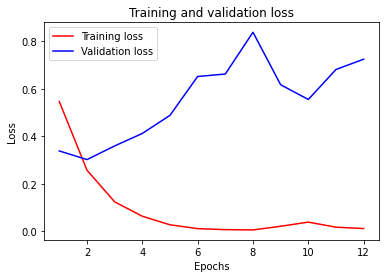

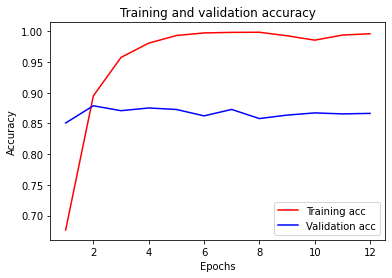

              precision    recall  f1-score   support

           0      0.910     0.834     0.870     12500
           1      0.847     0.917     0.881     12500

    accuracy                          0.876     25000
   macro avg      0.878     0.876     0.875     25000
weighted avg      0.878     0.876     0.875     25000


Average accuracy: 0.8761 (+/- 0.0022)
Average loss: 0.2950 (+/- 0.0038)
Average F1: 0.8771 (+/- 0.0033)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    GlobalMaxPool1D(),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_valid, y=y_valid, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
